# Машинное обучение, ФКН ВШЭ

## Практическое задание 4. Классификация. 

### Общая информация
Дата выдачи: 20.10.2020

Мягкий дедлайн: 01:59MSK 02.11.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 01:59MSK 05.11.2020

### О задании

В этом задании вы:
- ознакомитесь с тем, что происходит "внутри" метода опорных векторов и логистической регрессии
- познакомитесь с калибровкой вероятности
- изучите методы трансформации переменных и методы отбора признаков
- попробуете оценить экономический эффект модели


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-04-classification-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-04-classification-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10 + 0.5 + 0.01

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Часть 0. SVM, LR и калибровка вероятностей. 

Сгенерируем синтетические данные.

In [68]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve, plot_roc_curve, plot_precision_recall_curve

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов и логистической регрессии.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили линейный вариант без ядрового перехода, что соответствует линейному ядру (`LinearSVC` или же `SVC(kernel='linear')` в `sklearn.svm`). Подберите параметр регуляризации `C` (можете воспользоваться кросс-валидацией или отделить валидационную выборку от обучающей). 

In [69]:
#your code here
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X_train, y_train)
for c in np.logspace(-3, 2, num=6):
    svm = SVC(C=c, kernel='linear')
    svm.fit(X_train_val, y_train_val)
    r2 = svm.score(X_test_val, y_test_val)
    print(r2, 'for c', c)

0.7874285714285715 for c 0.001
0.788 for c 0.01
0.7897142857142857 for c 0.1
0.7897142857142857 for c 1.0
0.7897142857142857 for c 10.0
0.7897142857142857 for c 100.0


При нескольких запусках ответы меняются, но между собой с точностью до 2-3 знаков они равны. Поэтому можно забить на параметр С (я поставлю его 0.01, так как быстрее всего обучается). Кстати, с логистической регрессией такая же фигня.

На тестовой части посчитайте AUC-ROC, AUC-PR с точностью до 5 знаков. Постройте ROC и PR кривые, сравните их с ответами случайного классификатора. Заметим, что с помощью `sklearn` можно посчитать обе метрики двумя разными способами - в чем их различия? Сравните результаты. 
**Ответ** Отличие в том, что в одном способе мы сразу готовенько считаем, а в другом мы даем 2 массива и аук сам площадь считает под кривой, задаваемой массивами. Хз, почему у презижна название такое, возможно я не угадал 2 способ, но вроде 3 знака после зпт совпадают, так что похоже на правду.

0.84786
0.84786
0.81588
0.81547


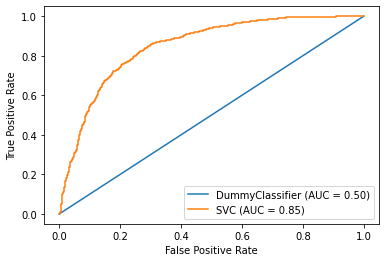

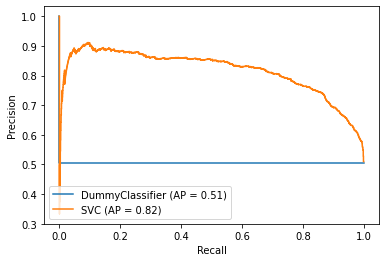

In [70]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, average_precision_score
svm = SVC(C=0.01, kernel='linear')
svm.fit(X_train, y_train)
y_score = svm.decision_function(X_test)
print(format(roc_auc_score(y_test, y_score), '.5f')) # 2 способа для AUC-ROC
print(format(auc(roc_curve(y_test, y_score)[0], roc_curve(y_test, y_score)[1]), '.5f'))
print(format(average_precision_score(y_test, y_score), '.5f')) # 2 способа для AUC-ROC
print(format(auc(precision_recall_curve(y_test, y_score)[1], 
          precision_recall_curve(y_test, y_score)[0]), '.5f'))

rnd = DummyClassifier(strategy='uniform')
rnd.fit(X_train, y_train)

# FROM https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python/61953038#61953038?newreg=877ca332d46f4a55ac849e9788463eeb
classifiers = [rnd, svm]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)
plt.show()

classifiers = [rnd, svm]
ax = plt.gca()
for i in classifiers:
    plot_precision_recall_curve(i, X_test, y_test, ax=ax)
plt.show()



А теперь проделайте все то же самое для логистической регрессии (LR) — обучение, подбор параметра регуляризации (используйте L2-регуляризацию), вычисление всех метрик и построение кривых. Сравните результаты LR и SVM с точки зрения всех вычисленных критериев качества, объясните различия (если они есть).

In [71]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve, plot_roc_curve, plot_precision_recall_curve

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X_train, y_train)
for c in np.logspace(-3, 4, num=8):
    lgr = LogisticRegression(C=c)
    lgr.fit(X_train_val, y_train_val)
    r2 = lgr.score(X_test_val, y_test_val)
    print(r2, 'for c', c)

0.7405714285714285 for c 0.001
0.74 for c 0.01
0.74 for c 0.1
0.74 for c 1.0
0.74 for c 10.0
0.74 for c 100.0
0.74 for c 1000.0
0.74 for c 10000.0


0.84787
0.82912


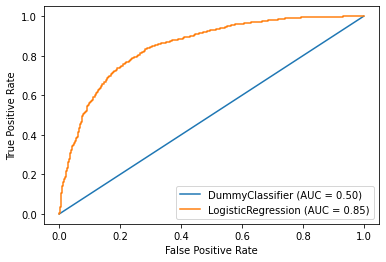

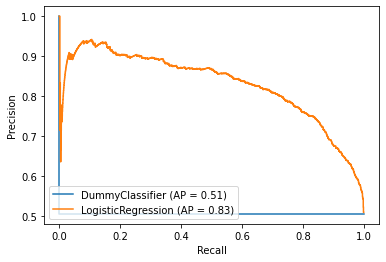

In [72]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_score = lgr.decision_function(X_test)
print(format(roc_auc_score(y_test, y_score), '.5f')) 
print(format(auc(precision_recall_curve(y_test, y_score)[1], 
          precision_recall_curve(y_test, y_score)[0]), '.5f'))

classifiers = [rnd, lgr]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)
plt.show()

classifiers = [rnd, lgr]
ax = plt.gca()
for i in classifiers:
    plot_precision_recall_curve(i, X_test, y_test, ax=ax)
plt.show()


Единственное существенное (нет) различие, которое я нашел, состоит в том, что у LR PR-кривая не так сильно падает на дно в самом начале.
То есть при высокой точности полнота не так ухудшается, как у СВМ. А, ну это изи объяснить. Просто первый же объект СВМ не угадывает, а ЛР угадывает.

В названии метода опорных векторов присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью `make_classification` с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут `support_vectors_`). В этот раз, если необходимо, вместо `LinearSVC` воспользуйтесь `SVC(kernel='linear')`, так как только в нём есть информация об опорных векторах.

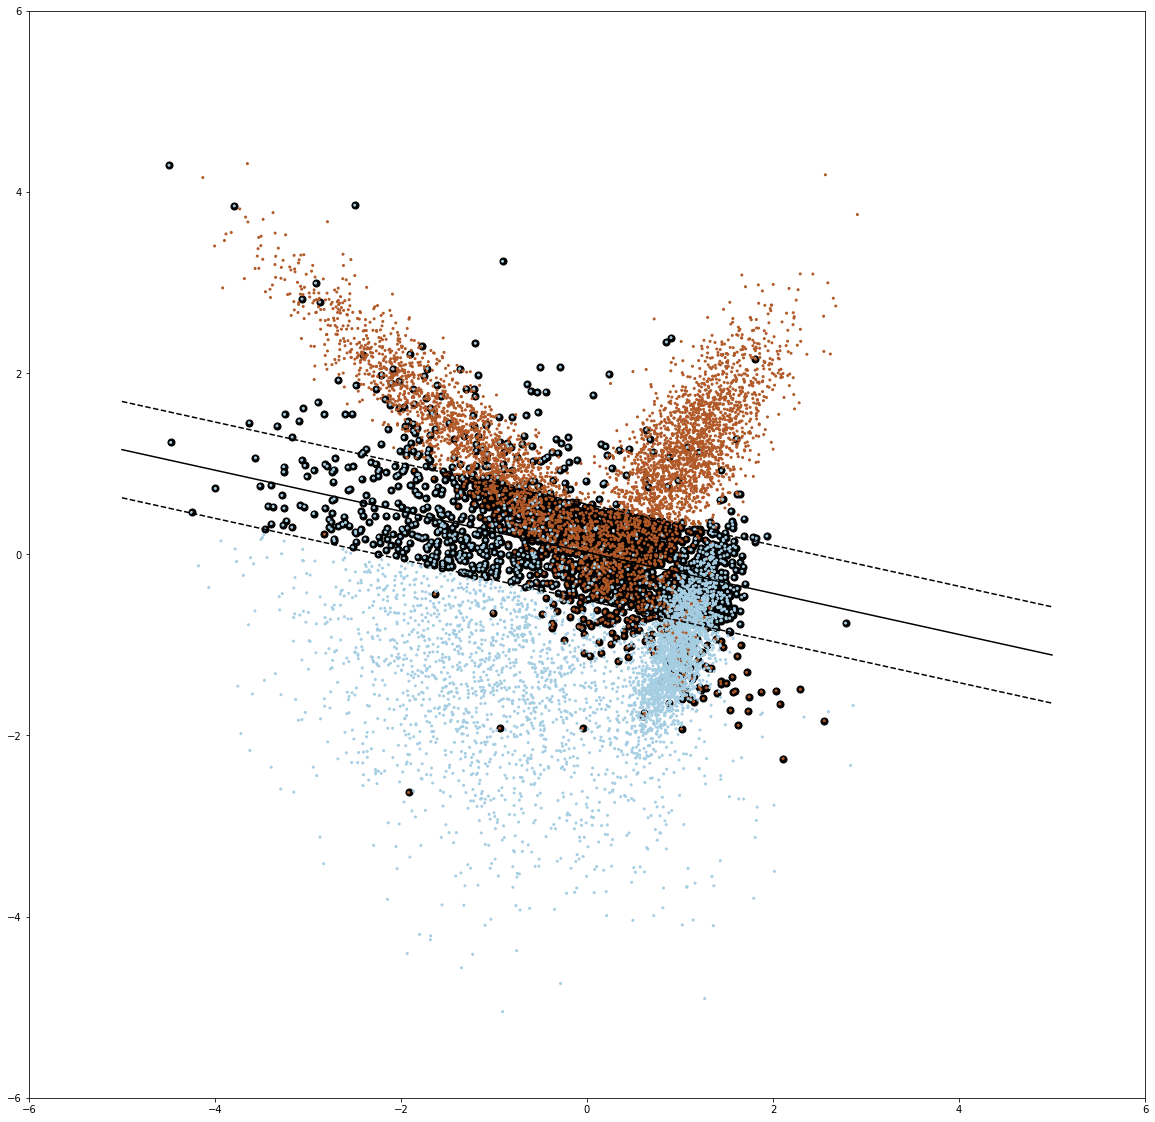

In [73]:
X, y = make_classification(
    n_samples=10000, n_features=2, n_informative=2, n_redundant=0,
    random_state=42)
# FROM https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

clf = SVC(kernel='linear')
clf.fit(X, y)

# calculate separating line
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

#calculate margin lines
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot separateed line and the margin lines
plt.figure(figsize=(20, 20))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# here are support vectors. On the sccatter they are big and black
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50, c='black')
#all objects
plt.scatter(X[:, 0], X[:, 1], s=4, c=y, cmap=plt.cm.Paired)

#scaling
x_min = -6
x_max = 6
y_min = -6
y_max = 6
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

В отличие от метода опорных векторов, логистическая регрессия не пытается построить разделяющую гиперплоскость, а приближает в каждой точке пространства объектов правдоподобие положительных ответов $p(y=+1|x)$. Попробуйте нарисовать это распределение на плоскости, не забудьте отметить на ней все объекты. Вам может помочь функция `plt.pcolor`.

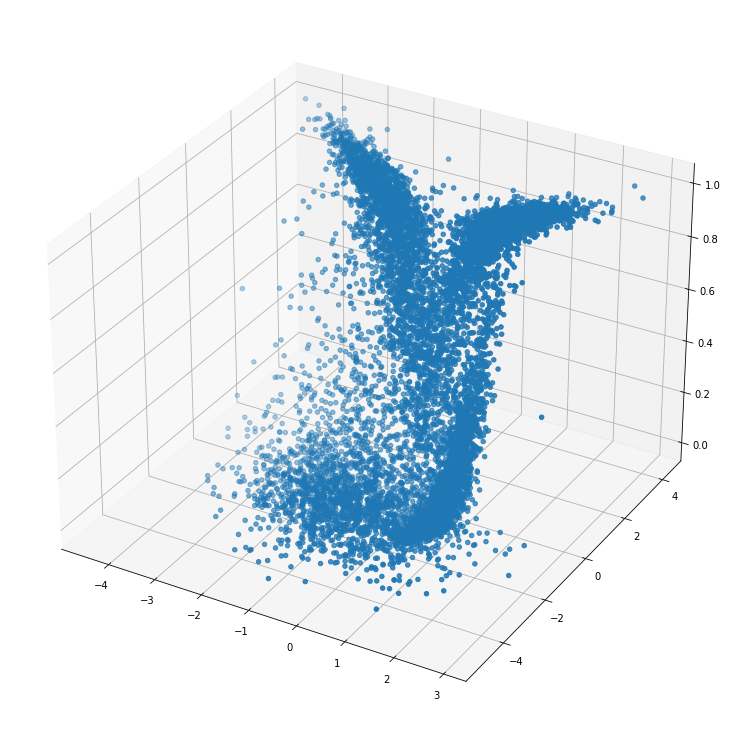

In [74]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
clf = LogisticRegression()
clf.fit(X, y)
pred = pd.DataFrame(clf.predict_proba(X))
pred.columns = ['drop', 'proba']
pred.drop('drop', axis=1, inplace=True)
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], pred)
plt.show()
# pcolor мне не понравилась, мне кажется, это круче

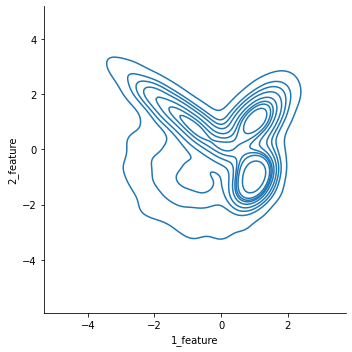

In [75]:
# Это просто распределение (без учета вероятностей)
df = pred.merge(pd.DataFrame(X), left_index=True, right_index=True)
df.columns = ['proba', '1_feature', '2_feature']
sns.displot(data=df, x='1_feature', y='2_feature',stat="probability", kind='kde')

__Задание 2.__ Калибровка вероятностей.

__(1 балл)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [76]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) # раз +
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1)) # два mean
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid()

Сгенерируйте синтетический датасет аналогично использованному в самом первом задании. Постройте калибровочные кривые на тестовой части для логистической регрессии и метода опорных векторов (не забудьте перевести его предсказания в $[0;1]$). Изучите распределение ответов классификаторов (постройте гистограммы с помощью `plt.hist`). Чем они различаются? Чем вы можете объяснить это?

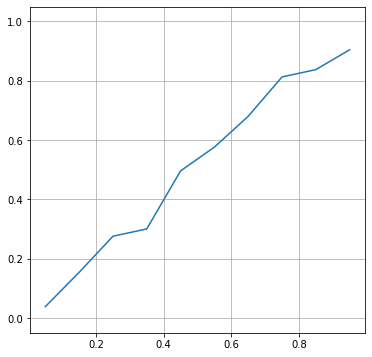

In [77]:
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

def softmax(x):
    return np.exp(x) / sum(np.exp(x))
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# LR
lr = LogisticRegression()
lr.fit(X_train, y_train)
#y_pred_lr = lr.predict_proba(X_test)[:,1]
y_pred_lr = sigmoid(lr.decision_function(X_test))
plot_calibration_curve(y_test, y_pred_lr)

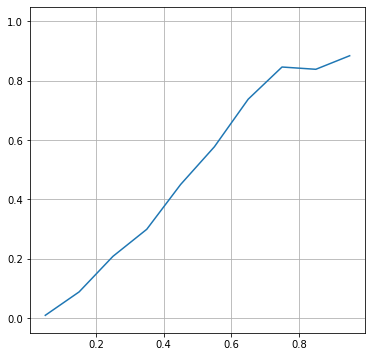

In [78]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = sigmoid(svm.decision_function(X_test))
plot_calibration_curve(y_test, y_pred_svm)

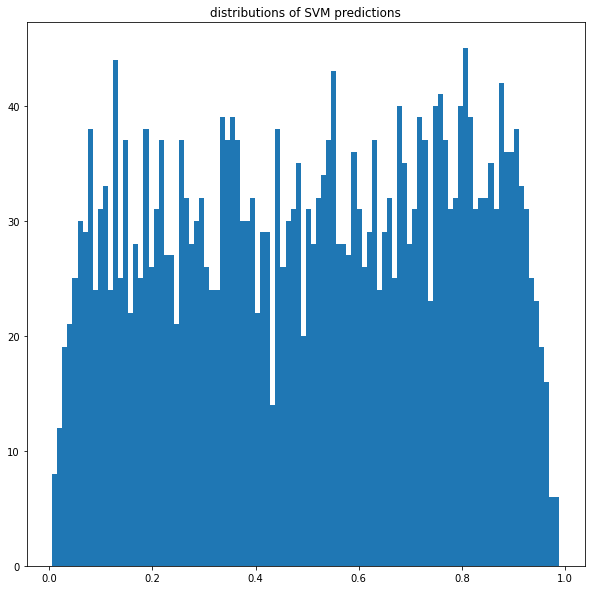

In [79]:
plt.figure(figsize=(10, 10))
plt.hist(y_pred_svm, bins=100)
plt.title('distributions of SVM predictions')
plt.show()

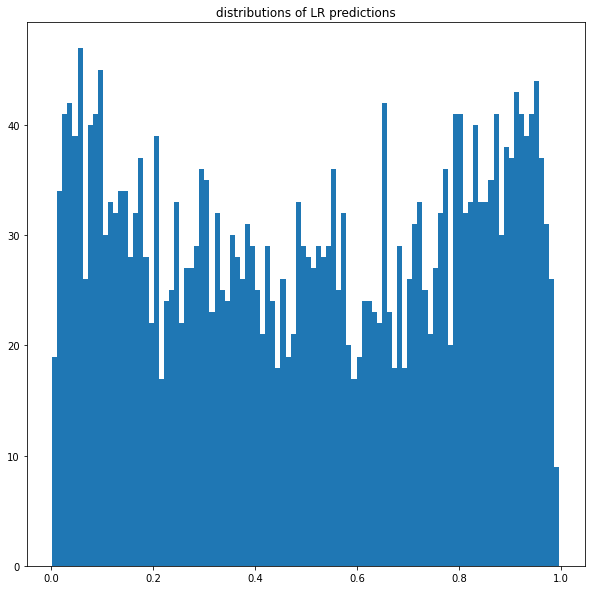

In [80]:
plt.figure(figsize=(10, 10))
plt.hist(y_pred_lr, bins=100)
plt.title('distributions of LR predictions')
plt.show()

Воспользуйтесь `CalibratedClassifierCV` из `sklearn` для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

Ну вроде стала получше в плане того, что точнее проходит через диагональные точки (прошлая шла сначала ниже, потом выше) и в конце у нее загиб не такой отбитый, как был. Но я бы сказал, что не сильно лучше, так как в середине ее колбасит от души. Ну типо в области неуверенности (p=0.5) так и должно быть, так что все нормас. Будем считать, улучшили)

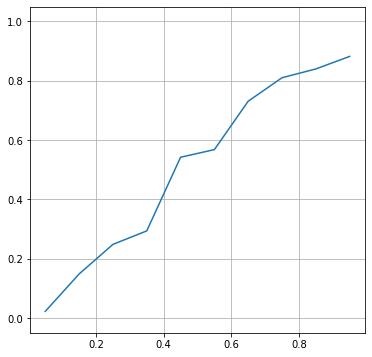

In [81]:
from sklearn.calibration import CalibratedClassifierCV
cal_svm = CalibratedClassifierCV(svm)
cal_svm.fit(X_train, y_train)
y_pred_cal_svm = cal_svm.predict(X_test) # вот предсказания
plot_calibration_curve(y_test, cal_svm.predict_proba(X_test)[:,1])

__Бонусное задание (0.5 балла).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты. Ключевые слова для вдохновения: `Platt`, `Isotonic`.

In [70]:
#your code here

# Часть 1. Работа с переменными.

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Этот датасет содержит информацию о банковском телефонном маркетинге, объектом в нем является телефонный звонок потенциальному клиенту с предложением некоторой услуги (утверждается, что это краткосрочный депозит), целевой переменной - ответ клиента (согласился ли он открыть депозит?). В качестве признакового описания используются характеристики клиента (образование, брак и т.д.), данные о звонке и различные экономические индикаторы - более подробная информация представлена в файле `bank-additional-names.txt`.

In [4]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
#!unzip bank-additional.zip
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


__Задание 3 (0.5 балла).__ Разделите выборку на обучающую и тестовую в соотношении 3:1. Зафиксируйте `random_state=777`, также используйте `stratify`. Один из столбцов в данных не несет информации для решения задачи — какой? Отбросьте его. 



In [6]:
df.drop('duration', axis=1, inplace=True) 
X = df.drop('y', axis=1)
y = (df['y'] == 'yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=777, stratify = y)
#категориальные признаки
categs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'] 

In [7]:
import warnings 
warnings.filterwarnings(action='once')

Закодируйте категориальные признаки с помощью `OrdinalEncoder`. Посчитайте качество (в этом задании будем работать c `AUC-PR`) при применении логистической регрессии. Замерьте время, потребовавшееся на обучение модели (с учетом кодирования признаков).

__Вопрос__: почему в данном задании мы выбрали метрикой именно `AUC-PR`, а не, к примеру, `AUC-ROC`?

__Ваш ответ__: потому что нам важен именно параметр recall, т.е. чтоб мы не пропускали тех, кто готов взять кредит и дать нам деняк. Ну а с recall идет precision (ну т.е. знать, на сколько вообще модель угадала, чтоб всем не звонить)

In [8]:
from sklearn.preprocessing import OrdinalEncoder
import time
from scipy.sparse import hstack, csr_matrix
def AUC_PR(y_test, X_test, clf):
    y_score = clf.decision_function(X_test)
    return auc(precision_recall_curve(y_test, y_score)[1], precision_recall_curve(y_test, y_score)[0])

start_time = time.time()
enc = OrdinalEncoder()
enc.fit(X[categs])
X_tr_ord = hstack([enc.transform(X_train[categs]), csr_matrix(X_train.drop(categs, axis=1))])
X_te_ord = hstack([enc.transform(X_test[categs]), csr_matrix(X_test.drop(categs, axis=1))])
lr = LogisticRegression()
lr.fit(X_tr_ord, y_train)
print(f'time: {time.time() - start_time}') # working time
print(f'auc-pr: {AUC_PR(y_test, X_te_ord, lr)}') # AUC-PR 

c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time: 0.7717387676239014
auc-pr: 0.41219724648031436


c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


__Задание 4 (0.5 балла).__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на кодирование категориальных признаков и обучение модели.



In [10]:
from sklearn.preprocessing import OneHotEncoder

start_time = time.time()
enc = OneHotEncoder()
enc.fit(X[categs])
X_tr_ohe = hstack([enc.transform(X_train[categs]), csr_matrix(X_train.drop(categs, axis=1))])
X_te_ohe = hstack([enc.transform(X_test[categs]), csr_matrix(X_test.drop(categs, axis=1))])
lr = LogisticRegression()
lr.fit(X_tr_ohe, y_train)
print(f'time: {time.time() - start_time}') # working time
print(f'auc-pr: {AUC_PR(y_test, X_te_ohe, lr)}') # AUC-PR 

c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time: 0.7089252471923828
auc-pr: 0.43506322921370344


c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


У второй модели качество повыше (0.44 > 0.41), но и обучается + кодируется она поменьше, хотя не сильно (0.6 сек). В общем, все это в пределах погрешности, мне кажется, поэтому нет, не отличаются. Но onehot покруче

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирования категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 5 (1 балл).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущими экспериментами (с учетом кодирования признаков). Заметили ли вы что-то интересное?


__Бонус (1 балл)__: Здесь и далее реализуйте вычисление счетчиков с помощью трансформера (наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`). Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и изменять только их. 


In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
class SchetchicEncoder(BaseEstimator, TransformerMixin): #зацените название, знаю, вы такое любите
    def __init__(self, categories='auto', noise_var=0, C=0):
        self.categories = categories
        self.data = dict()
        self.noise_var = noise_var
        self.C = C
        self.glob_mean = 0
        
    def fit(self, X, y):
        self.glob_mean = np.mean(y)
        df = X.copy()
        df['TARGET'] = y 
        categories = self.categories
        if categories == 'auto':
            categories = df.columns[:-1]
        self.data = dict()
        for col in categories:
            gr = df.groupby(col)[df.columns[-1]]
            gr2 = (gr.sum() + self.C * self.glob_mean) / (gr.count() + self.C)
            gr2 += np.random.normal(0, self.noise_var, len(gr2))
            gr2.loc['NO_CATEG'] = self.glob_mean
            self.data[col] = gr2 
        return self
    
    def transform(self, X):
        df = X.copy().reset_index() 
        categories = self.categories
        if categories == 'auto':
            categories = df.columns[1:]
        
            
            
        X_ = df[['index']]
        for col in categories:
            new_categs = set(df[col].unique()) - set(self.data[col].index) 
            
            def func(s):
                if s in new_categs:
                    return 'NO_CATEG'
                return s
        
            X_[col] = self.data[col].loc[np.array(map(func, df[col]))].array
            
        return X_.merge(X.drop(categories, axis=1), left_on='index', right_index=True).drop('index', axis=1)

c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
start_time = time.time()
senc = SchetchicEncoder(categs)
senc.fit(X_train, y_train)
X_tr_se = senc.transform(X_train)
X_te_se = senc.transform(X_test)
lr = LogisticRegression()
lr.fit(X_tr_se, y_train)
print(f'time: {time.time() - start_time}') # working time
print(f'auc-pr: {AUC_PR(y_test, X_te_se, lr)}') # AUC-PR 

c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


time: 1.308159351348877
auc-pr: 0.4172857578574802


c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Хз, на сколько это интересно, но качество модели такое себе (как у ординал енкодера), хотя обучается (или кодируется) она медленнее, чем обе те. Но это потому что ее я ручками кодирую))0

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__Задание 6.__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (постарайтесь найти баланс между борьбой с переобучением и сохранением полезности признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

__(0.5 балла)__

In [33]:
# Пытаемся найти баланс
warnings.filterwarnings('ignore')
lst = []
for nv in np.linspace(0, 3, 20):
    start_time = time.time()
    val = 0
    for k in range(3):
        senc = SchetchicEncoder(categs, noise_var=nv)
        senc.fit(X_train, y_train)
        X_tr_se = senc.transform(X_train)
        X_te_se = senc.transform(X_test)
        lr = LogisticRegression()
        lr.fit(X_tr_se, y_train)
        val += AUC_PR(y_test, X_te_se, lr)
    print('for noise_var ', nv)
    print(time.time() - start_time) # working time
    aucpr = val / 3.0 
    lst.append(aucpr)
    print(aucpr) # AUC-PR 
    print()

c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


for noise_var  0.0
3.1229114532470703
0.4172857578574802

for noise_var  0.15789473684210525
2.709699869155884
0.418895796065531

for noise_var  0.3157894736842105
2.0042502880096436
0.41881818017094935

for noise_var  0.47368421052631576
2.134697198867798
0.42645866959052653

for noise_var  0.631578947368421
2.1806070804595947
0.42419605107586916

for noise_var  0.7894736842105263
2.192654848098755
0.4282296909627248

for noise_var  0.9473684210526315
2.4151926040649414
0.4250374071820872

for noise_var  1.1052631578947367
2.8073995113372803
0.4190486518359727

for noise_var  1.263157894736842
3.132275104522705
0.4250599605964199

for noise_var  1.4210526315789473
2.1673669815063477
0.4220915515042283

for noise_var  1.5789473684210527
3.158212184906006
0.42293659180312426

for noise_var  1.7368421052631577
2.662905693054199
0.42118854509089493

for noise_var  1.894736842105263
2.9037117958068848
0.4266188606437802

for noise_var  2.052631578947368
2.404742956161499
0.4315252986388059

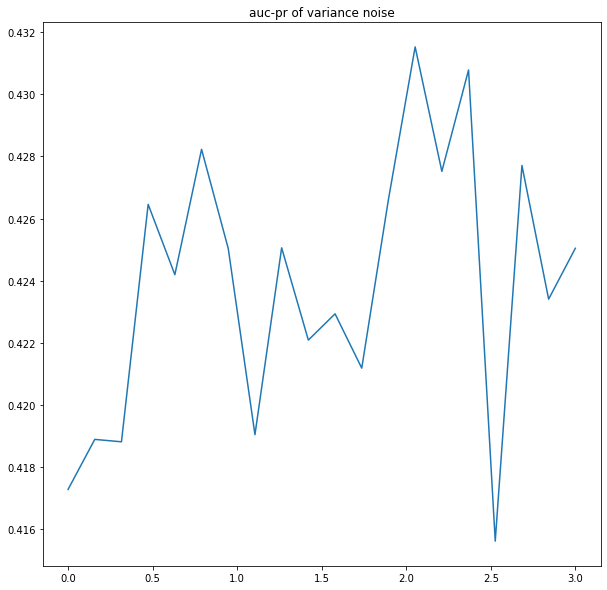

In [34]:
plt.figure(figsize=(10, 10))
plt.plot(np.linspace(0, 3, 20), lst)
plt.title('auc-pr of variance noise')
plt.show()

Видим, что особо не помогло. От 0.42 модель все равно далеко не уходит. Подборкой шума это не лечится(

__(Бонусная часть, 0.5 балла)__ Посчитайте корректные счётчики первым или вторым способов из описанных выше (не забудьте добавить и шум). 



In [72]:
#your code here

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — доля объектов положительного класса в выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значением. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!


__Задание 7 (1 балл).__ Добавьте сглаживание, описанное выше и повторите эксперименты.

In [35]:
warnings.filterwarnings('ignore')
lst = []
for c in np.linspace(0, 100, 20):
    start_time = time.time()
    val = 0
    for k in range(3):
        senc = SchetchicEncoder(categs, noise_var=1.5, C=c)
        senc.fit(X_train, y_train)
        X_tr_se = senc.transform(X_train)
        X_te_se = senc.transform(X_test)
        lr = LogisticRegression()
        lr.fit(X_tr_se, y_train)
        val += AUC_PR(y_test, X_te_se, lr)
    print('for C ', c)
    print(time.time() - start_time) # working time
    aucpr = val / 3.0 
    lst.append(aucpr)
    print(aucpr) # AUC-PR 
    print()

for C  0.0
2.882671356201172
0.41903417093890427

for C  5.2631578947368425
2.6728620529174805
0.42545208821921315

for C  10.526315789473685
2.077591896057129
0.41924875786264165

for C  15.789473684210527
2.1583428382873535
0.4229762161525881

for C  21.05263157894737
2.3734562397003174
0.4261799023741592

for C  26.315789473684212
2.287320852279663
0.42396237000332193

for C  31.578947368421055
2.642613172531128
0.42342322787629927

for C  36.8421052631579
2.321112871170044
0.42220579978411954

for C  42.10526315789474
2.6160502433776855
0.42473697076615924

for C  47.36842105263158
3.5732884407043457
0.4213502651331025

for C  52.631578947368425
2.430248498916626
0.42785115796791806

for C  57.89473684210527
2.0730652809143066
0.42934282742934887

for C  63.15789473684211
2.62380313873291
0.42898997067078265

for C  68.42105263157896
2.388455867767334
0.4193170591945139

for C  73.6842105263158
2.0690200328826904
0.43217273793057126

for C  78.94736842105263
2.45731520652771
0.4283

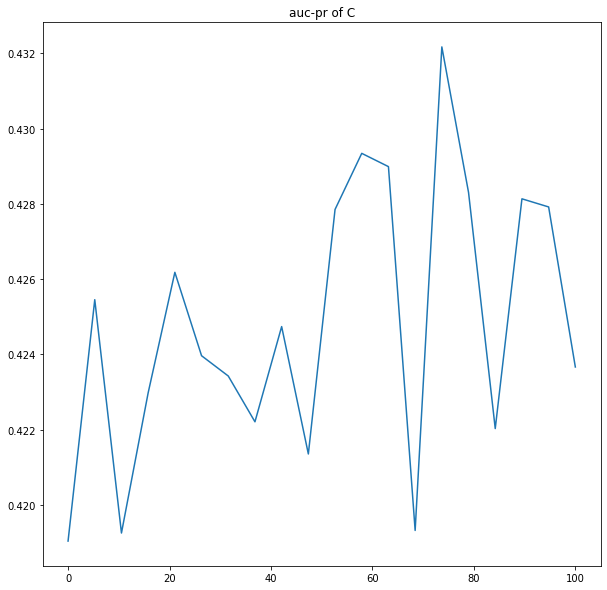

In [36]:
plt.figure(figsize=(10, 10))
plt.plot(np.linspace(0, 100, 20), lst)
plt.title('auc-pr of C')
plt.show()

Эта штука вроде хуже не делает) В общем, тоже ощутимо не помогло

__Задание 8 (0.5 балла).__ В данных имеется признак "возраст клиента". Сейчас мы интерпретируем его как числовой, что в общем случае для линейной модели может быть неверной гипотезой. Тем не менее, у этого признака есть довольно много уникальных значений (сколько? 78), поэтому применять к нему one-hot кодирование может оказаться излишним. Попробуйте закодировать возраст с помощью счетчиков. Стало ли лучше?



In [37]:
print(len(X.age.unique())) # столько
se = SchetchicEncoder(categories=['age'] + categs)
se.fit(X_train, y_train)
X_tr_se = se.transform(X_train)
X_te_se = se.transform(X_test)
lr = LogisticRegression()
lr.fit(X_tr_se, y_train)
print(AUC_PR(y_test, X_te_se, lr))

78
0.4068874721662485


Нет, не стало(

Можно пойти и в обратную сторону. У нас есть признаки "месяц и день недели" для звонка. Попробуйте интерпретировать их как числовые (месяц от 0 до 12 (- 13 месяцев это сильно), дни недели от 0 до 4). Стало ли лучше в этот раз?

In [38]:
#X = X_save.copy()
X['day_of_week'] = (X.day_of_week == 'mon') * 0 + (X.day_of_week == 'tue') * 1 + (X.day_of_week == 'wed') * 2 + (X.day_of_week == 'thu') * 3 + (X.day_of_week == 'fri') * 4
X['month'] = ((X.month == 'mar') * 0 + 
             (X.month == 'apr') * 1 + 
             (X.month == 'may') * 2 + 
             (X.month == 'jun') * 3 + 
             (X.month == 'jul') * 4 + 
             (X.month == 'aug') * 5 + 
             (X.month == 'sep') * 6 + 
             (X.month == 'oct') * 7 + 
             (X.month == 'nov') * 8 + 
             (X.month == 'dec') * 9)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,2,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,2,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,2,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,2,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,2,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,8,4,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,8,4,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,8,4,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,8,4,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [39]:
categs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome'] 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=777, stratify = y)
se = SchetchicEncoder(categories=categs)
se.fit(X_train, y_train)
X_tr_se = se.transform(X_train)
X_te_se = se.transform(X_test)
lr = LogisticRegression()
lr.fit(X_tr_se, y_train)
print(AUC_PR(y_test, X_te_se, lr))
categs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'] 

0.4099388621441845


__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием вы заметили.

__Ответ:__ Ну на самом деле особо плюсов не заметил. Типо в ohe все просто: бахнут ванхот по всем категориям и не паришься ни с переобучением, ни с тем, как лучше сгладить или зашумить, ни с тем, какие категории норм кодировать счетчиками. Много признаков? Да не совсем, мб на порядок и вырастет кол-во, ну и ладно.
Со всем этим гемороем качество они дают того же порядка. По времени тоже не сильно быстрее.

В общем: onehot сила, счетчик могила

# Часть 2. Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про банковский телефонный маркетинг.

In [40]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y']) 
y = (df.y == 'yes')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

Как вы помните, в данных много категориальных признаков (сейчас давайте интерпретировать возраст как числовой). Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили? 62

In [41]:
from sklearn.preprocessing import OneHotEncoder
import time
from scipy.sparse import hstack, csr_matrix
categs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'] 
enc = OneHotEncoder()
enc.fit(X[categs])
X_ohe = hstack([enc.transform(X[categs]), csr_matrix(X.drop(categs, axis=1))])
X_ohe.shape[1]

62

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — `AUC-PR`. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

Давайте, 0.43

In [42]:
def AUC_PR(y_test, X_test, clf):
    y_score = clf.decision_function(X_test)
    return auc(precision_recall_curve(y_test, y_score)[1], precision_recall_curve(y_test, y_score)[0])

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.2, random_state=777, stratify=y)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(AUC_PR(y_test, X_test, lr))

0.4295629296907761


### Встроенные методы

Допустим, мы хотим оставить только 40 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8 (0.5 балла).__ Оставьте 40 признаков с наибольшим модулем соответствующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?

Изменилось почти на 0.01. Выглядит круто!

In [43]:
start_time = time.time()
idxs = np.argsort(-np.abs(lr.coef_[0]))[:40]
X_40 = pd.DataFrame(X_ohe.todense())[idxs]
print(f'time: {time.time() - start_time}')
X_train_40, X_test_40, y_train, y_test = train_test_split(X_40, y, test_size=0.2, random_state=777, stratify=y)

lr_40 = LogisticRegression()
lr_40.fit(X_train_40, y_train)
print(AUC_PR(y_test, X_test_40, lr_40))

time: 0.04436683654785156
0.43813897860906004


А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отмасштабируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось? 

Видно, что само масштабирование помогло: качество модели со всеми признаками вырасло на 0.02 по сравнению с тем, что было без масштабирования. Зато отбор признаков особо лучше не сделал. +1 в 3 знаке. бе

In [44]:
#scaling
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_sc = scl.fit_transform(X_ohe.todense())
X_train_sc, X_test_sc, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=777, stratify=y)

# fitting all features
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
print(f'AUC-PR of lr with all features : {AUC_PR(y_test, X_test_sc, lr)}')

# fitting 40 best
idxs = np.argsort(-np.abs(lr.coef_[0]))[:40]
X_sc_40 = pd.DataFrame(X_sc)[idxs]
X_train_sc_40, X_test_sc_40, y_train, y_test = train_test_split(X_sc_40, y, test_size=0.2, random_state=777, stratify=y)
lr_40 = LogisticRegression()
lr_40.fit(X_train_sc_40, y_train)
print(f'AUC-PR of lr with 40 best: {AUC_PR(y_test, X_test_sc_40, lr_40)}')

AUC-PR of lr with all features : 0.4472533260794472
AUC-PR of lr with 40 best: 0.4483421097161027


Вопрос на засыпку: one-hot кодирование возвращает нам единичные признаки-индикаторы. Попробуйте также отскалировать их, как и обычные числовые, и снова выбрать 40 главных по вкладу признаков. Изменился ли их список? Изменится ли качество?

Ну до этого я скалировал все, так что теперь вернем one-hotы и отскалируем только остальные. Видно, что качество не изменилось.
А вот список важный признаков существенно откличается. Видимо, это значит, что среди 40 все равно куча признаков не нужных

In [45]:
scl = StandardScaler()
enc = OneHotEncoder()
enc.fit(X[categs])
X_sc = hstack([enc.transform(X[categs]), csr_matrix(scl.fit_transform(X.drop(categs, axis=1)))]).todense()
X_train_sc, X_test_sc, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=777, stratify=y)

# fitting all features
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
print(f'AUC-PR of lr with all features : {AUC_PR(y_test, X_test_sc, lr)}')

# fitting 40 best
idxs2 = np.argsort(-np.abs(lr.coef_[0]))[:40]
X_sc_40 = pd.DataFrame(X_sc)[idxs2]
X_train_sc_40, X_test_sc_40, y_train, y_test = train_test_split(X_sc_40, y, test_size=0.2, random_state=777, stratify=y)
lr_40 = LogisticRegression()
lr_40.fit(X_train_sc_40, y_train)
print(f'AUC-PR of lr with 40 best: {AUC_PR(y_test, X_test_sc_40, lr_40)}')

AUC-PR of lr with all features : 0.4472935907091675
AUC-PR of lr with 40 best: 0.4483108494563715


In [46]:
set(idxs) - set(idxs2)

{0, 9, 17, 22, 26, 33, 38, 44, 47, 48, 49, 51, 52, 56}

### Методы фильтрации


Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(j) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu$, $\sigma$, $n$ соответственно среднее, стандартное отклонение и количество объектов каждого из классов.

__Задание 9 (0.5 балла).__ Оставьте 40 признаков с наибольшим значением $t$ и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случае.



In [47]:
start_time = time.time()
X_pos = X_sc[y]
X_neg = X_sc[y == False] # нибейти, not y не работает, а гуглить, как там с векторами работать влом
m_pos = np.mean(X_pos, axis=0)
m_neg = np.mean(X_neg, axis=0)
v_pos = np.var(X_pos, axis=0)
v_neg = np.var(X_neg, axis=0)
n_pos = len(X_pos)
n_neg = len(X_neg)
t = np.array(np.abs(m_pos - m_neg) / np.sqrt((n_pos * v_pos + n_neg * v_neg) / (n_pos + n_neg)))[0]
idxs = np.argsort(-t)[:40]
X_filter = pd.DataFrame(X_sc)[idxs]
print(f'time: {time.time() - start_time}')
X_train_f, X_test_f, y_train, y_test = train_test_split(X_filter, y, test_size=0.2, random_state=777, stratify=y)

lr_f = LogisticRegression()
lr_f.fit(X_train_f, y_train)
print(AUC_PR(y_test, X_test_f, lr_f))

time: 0.07474279403686523
0.4514032129387773


О, вообще кайф. Еще +0.01!

### Методы-обёртки

__Задание 10 (1 балл).__ 

Третий из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не окажется выполненым некоторое условие (количество признаков или ухудшение качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите обучающую выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только для финальной оценки качества.

Снова оставьте только 40 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [58]:
start_time = time.time()
ftrs = X_sc.shape[1] # num of features rest
X_ = pd.DataFrame(X_sc)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.4, random_state=777, stratify=y)
print('|' * (ftrs-40))
throw = []
while ftrs > 40:    
    X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, 
                                                                            test_size=0.5, random_state=777, stratify=y_train)
    scores = []
    lst = list(set(range(ftrs)) - set(throw))
    for f in lst:
        lr = LogisticRegression()
        lr.fit(X_train_val.drop(f, axis=1), y_train_val)
        scores.append(AUC_PR(y_test_val, X_test_val.drop(f, axis=1), lr))
    f_min = lst[np.argmin(scores)]
    X_train.drop(f_min, axis=1, inplace=True)
    throw.append(f_min)
    print('|', end='')
    ftrs -= 1
X_test.drop(throw, axis=1, inplace=True)
print(f'time: {time.time() - start_time}')
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f'auc-pr: {AUC_PR(y_test, X_test, lr)}')

||||||||||||||||||||||
||||||||||||||||||||||time: 305.20265793800354
auc-pr: 0.4183477355918425


Блин, ну оно объективно того не стоило(

Стоит отметить, что с помощью такого метода можно пойти и в обратную сторону. Попробуйте _добавлять_ по одному самому полезному признаку в выборку до тех пор, пока не наберется 40 штук. Найдется ли порог, при котором добавление следующих признаков будет только ухудшать качество модели? 
Нет, не найдется, модель всегда может приписать ему 0 вес и гг.

In [61]:
start_time = time.time()
ftrs = 0 # num of features rest

X_ = pd.DataFrame(X_sc)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.4, random_state=777, stratify=y)
print('|' * (40))
add = []
while ftrs < 40:    
    X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, 
                                                                            test_size=0.5, random_state=777, stratify=y_train)
    scores = []
    lst = list(set(range(X_sc.shape[1])) - set(add))
    for f in lst:
        lr = LogisticRegression()
        lr.fit(X_train_val[add + [f]], y_train_val)
        scores.append(AUC_PR(y_test_val, X_test_val[add + [f]], lr))
    f_max = lst[np.argmax(scores)]
    add.append(f_max)
    print('|', end='')
    ftrs += 1
print()
print(f'time: {time.time() - start_time}')
lr = LogisticRegression()
lr.fit(X_train[add], y_train)
print(f'auc-pr: {AUC_PR(y_test, X_test[add], lr)}')

||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||
time: 237.80632185935974
auc-pr: 0.43868024745134476


Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?
Ну вот статистика:

1) без выпендрежа:
AUC-PR: 0.43

2) веса линейной модели: 
time: 0.044; 
AUC-PR: 0.44

3) веса мастабированной линейной: 
AUC-PR of lr with all features : 0.447
AUC-PR of lr with 40 best: 0.448

4) скалируем onehot:
AUC-PR of lr with all features : 0.447
AUC-PR of lr with 40 best: 0.448

5) t-статистика:
time: 0.0747
AUC-PR: 0.451

6) исключаем плохие:
time: 305.20
auc-pr: 0.418

7) добавляем хорошие:
time: 237.8
auc-pr: 0.439


**Ответ:** Обертки до жопы долго работают, это у нас еще признаков не много. Ну и прибавку к качеству они особо не дают. Первая вариация вообще хуже сделала, а вторая +0.015 дала. Плюсов нет. Минусы - время. ВОзможно, плюсы появятся при другом кол-ве признаков.

t-stat - каеф. лучший результат +0.02 и кодируется очень быстро (в 2 раза дольше, чем при подсчете весов линрег). Плюсы: учитывает разброс ответов у данного признака, поэтому эффективна. Не очень долгая. Минусы - может быть сильный признак, но с большой дисперсией, его выкинем(

масштабированные веса линейной модели строго лучше немасштабированных, а скалировать onehot смысла нет. Поэтому скажу про первый метод. Плюсы: очень прост, быстро кодируется, дает прирост +0.02 (почти как t-stat). Минусы: да вроде нет, пацанский метод, я б взял.

# Часть 3. Оценка экономического эффекта модели

В данной части мы займемся тем, что от вас скорее всего потребуется на реальной работе (помимо перекладки `json`, разумеется). А именно: мы соберем несколько специализированных метрик качества, попытаемся настроить модель на максимизацию _прибыли_ и оценим, сколько вообще получится заработать на этом. Разумеется, здесь будет сделано множество упрощающих жизнь допущений, но обо всем по порядку. 

__Задание 11 (1 балл).__ Допустим, работники вашего колл-центра получают за один звонок клиенту 1 доллар. При согласии клиента на предлагаемые условия он принесет в банк 10 долларов.

Если вы всё прослушали на экономике, то напомним, что выручка — это сколько денег нам принесли клиенты, а прибыль — выручка за вычетом расходов на зарплату и прочее.

Загрузите данные о телемаркетинге из предыдущего блока заданий. В этой части не нужно делить выборку - мы будем использовать кросс-валидацию. Используйте 5 фолдов, сделайте `shuffle=True, random_state=500`. По кросс-валидации у вас получится 5 вариантов обучающей и тестовой выборки. Обучите логистическую регрессию на каждой обучающей выборке (воспользуйтесь one-hot для категориальных признаков, гиперпараметры оставьте со значениями по умолчанию) и сделайте предсказания для соответствующих тестовых выборок. Допустим, всем положительным прогнозам ваши сотрудники решили позвонить. Посчитайте на всех тестовых выборках выручку и усредните. Сколько денег вы в среднем заработаете? Также вычислите стандартное отклонение.

Сколько из заработанных денег придётся отдать операторам вашего колл-центра?

mean TR: 1768.0;
mean profit: 1513.8;
std of TR: 106.47065323364932;
std of profit: 104.03730100305371;
mean wage losses: 254.2

In [62]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
import time
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import KFold

df = pd.read_csv('bank-additional-full.csv', sep=';')

X_ = df.drop(columns=['duration', 'y']) 
y = (df.y == 'yes')

categs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'] 
enc = OneHotEncoder()
enc.fit(X_[categs])
X = pd.DataFrame(hstack([enc.transform(X_[categs]), csr_matrix(X_.drop(categs, axis=1))]).todense())

kf = KFold(n_splits=5, shuffle=True, random_state=500)
TR = []
calls = []
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X.loc[train], X.loc[test], y[train], y[test]
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    TR.append(10 * sum(y_pred * y_test))
    calls.append(sum(y_pred))
mean_TR = np.mean(TR)
mean_profit = np.mean(TR) - np.mean(calls)
sd_TR = np.std(TR)
sd_profit = np.std(np.array(TR) - np.array(calls))
print(f'mean TR: {mean_TR}')
print(f'mean profit: {mean_profit}')
print(f'std of TR: {sd_TR}')
print(f'std of profit: {sd_profit}')
print(f'mean wage losses: {np.mean(calls)}')

mean TR: 1768.0
mean profit: 1513.8
std of TR: 106.47065323364932
std of profit: 104.03730100305371
mean wage losses: 254.2


Внесем некоторую долю случайности. Пусть теперь согласный на условия клиент будет приносить не 10 долларов, а случайную величину, равномерно распределенную в интервале $[0;20)$. Проделайте все те же самые действия. Для имитации реальной ситуации **НЕ** фиксируйте `random_seed` при подсчете выручки с клиента. Что получилось?

Один из запусков:

mean TR: 1791.794971277862

mean profit: 1537.594971277862

std of TR: 151.8632545821811

std of profit: 147.89692129517124

mean wage losses: 254.2

Видно, что средняя выручка и прибыль не особо изменились, ст. отклонение в полтора раза выросло

In [63]:
kf = KFold(n_splits=5, shuffle=True, random_state=500)
TR = []
calls = []
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X.loc[train], X.loc[test], y[train], y[test]
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r = np.random.uniform(0, 20, len(y_test))
    TR.append(sum(y_pred * y_test * r))
    calls.append(sum(y_pred))
mean_TR = np.mean(TR)
mean_profit = np.mean(TR) - np.mean(calls)
sd_TR = np.std(TR)
sd_profit = np.std(np.array(TR) - np.array(calls))
print(f'mean TR: {mean_TR}')
print(f'mean profit: {mean_profit}')
print(f'std of TR: {sd_TR}')
print(f'std of profit: {sd_profit}')
print(f'mean wage losses: {np.mean(calls)}')

mean TR: 1790.4181163418361
mean profit: 1536.218116341836
std of TR: 133.16751767588906
std of profit: 135.7571128441154
mean wage losses: 254.2


Настройте по кросс-валидации коэффициент регуляризации модели для максимизации прибыли (считайте как случайную величину выше). Удалось ли получить какой-то выигрыш? При каком коэффициенте регуляризациии прибыль максимальна? Постройте график зависимости ожидаемой прибыли от коэффициента, также укажите стандартные отклонения (вам поможет `plt.errorbar`).

In [64]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
def score_profit(y_true, y_pred):
    r = np.random.uniform(0, 20, len(y_pred))
    return np.sum(r * y_pred * y_true) - np.sum(y_pred)
scoring=make_scorer(score_profit, greater_is_better=True)


space = np.logspace(-1, 4, num=10)
lr = LogisticRegression()
gs = GridSearchCV(lr, param_grid={'C': space}, scoring=scoring)
gs.fit(X, y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-01, 3.59381366e-01, 1.29154967e+00, 4.64158883e+00,
       1.66810054e+01, 5.99484250e+01, 2.15443469e+02, 7.74263683e+02,
       2.78255940e+03, 1.00000000e+04])},
             scoring=make_scorer(score_profit))

In [65]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.689509,0.039962,0.003704,0.000867,0.1,{'C': 0.1},0.0,0.0,99.554299,248.757164,4990.401017,1067.742496,1963.442044,5
1,0.674277,0.043254,0.004204,0.000987,0.359381,{'C': 0.35938136638046275},0.0,0.0,15.235064,233.262945,4725.571534,994.813909,1867.479396,8
2,0.680277,0.048980,0.004805,0.000981,1.29155,{'C': 1.291549665014884},0.0,0.0,62.235312,229.999650,4644.399038,987.326800,1830.472313,9
3,0.647876,0.030842,0.006199,0.000399,4.64159,{'C': 4.641588833612779},0.0,0.0,28.618729,194.787380,5040.092962,1052.699814,1995.014473,6
4,0.647032,0.018800,0.004399,0.001356,16.681,{'C': 16.68100537200059},0.0,0.0,16.601845,-709.505762,4947.958661,851.010949,2067.117355,10
5,0.671405,0.059934,0.004195,0.001170,59.9484,{'C': 59.94842503189409},0.0,0.0,12.611835,218.745762,5126.291365,1071.529792,2029.088044,4
6,0.691263,0.056268,0.004399,0.001021,215.443,{'C': 215.44346900318845},0.0,0.0,44.226514,470.350066,5047.273374,1112.369991,1975.414827,2
7,0.649657,0.025115,0.004397,0.001361,774.264,{'C': 774.2636826811278},0.0,0.0,18.362172,928.264880,4786.323367,1146.590084,1854.592145,1
8,0.692066,0.057191,0.003782,0.000718,2782.56,{'C': 2782.559402207126},0.0,0.0,24.635034,190.719155,5200.482809,1083.167400,2059.890485,3
9,0.624819,0.030983,0.003803,0.001163,10000,{'C': 10000.0},0.0,0.0,16.018281,222.949196,4972.560882,1042.305672,1966.942759,7


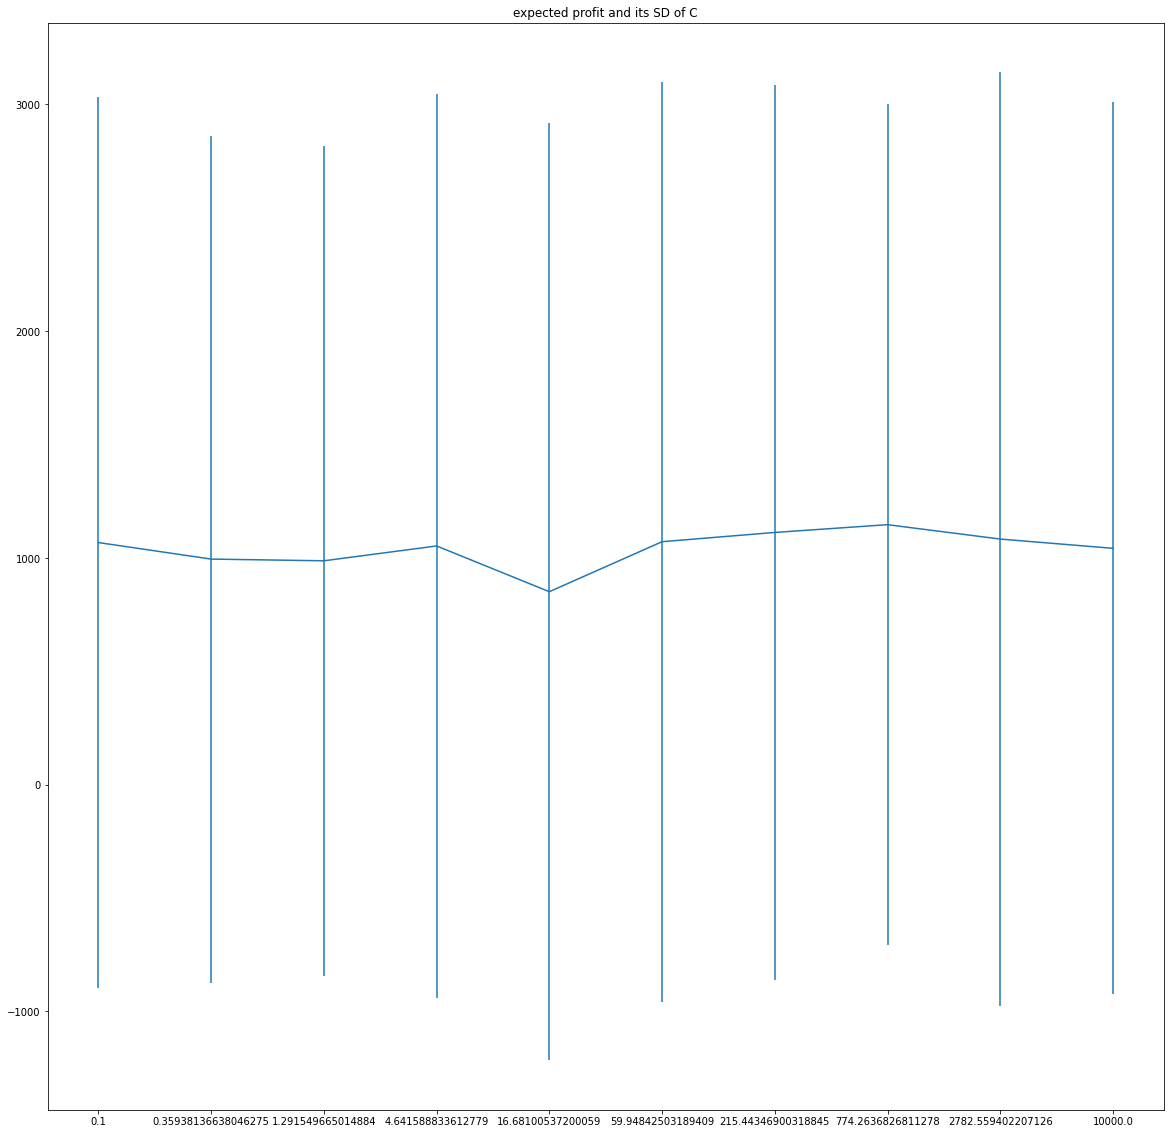

In [66]:
#from matplotlib.ticker import StrMethodFormatter
plt.figure(figsize=(20,20))
plt.errorbar(x=np.linspace(1, 10, num=10), y=gs.cv_results_['mean_test_score'], yerr=gs.cv_results_['std_test_score'])
plt.title('expected profit and its SD of C')
plt.xticks(np.linspace(1, 10, num=10), space)
#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.show()

In [67]:
gs.best_params_['C'] # примерно С=800

774.2636826811278

Попробуйте запустить перебор несколько раз. Находится ли каждый раз один и тот же "лучший" коэффициент? Присутствует ли какая-то закономерность? Какие вы можете сделать из этого выводы?

Порядок регуляризатора, конечно, не меняется, но разброс серьезный: от 200 до 800. То есть скорее всего реально он сильно меняется от 100 до 1000 в зависимости от случайной величины. То есть лучше обучаться при С=500 где-нибудь

In [108]:
for i in range(5):
    gs = GridSearchCV(lr, param_grid={'C': space}, scoring=scoring)
    gs.fit(X, y)
    print(gs.best_params_['C'])

774.2636826811278
215.44346900318845
774.2636826811278
774.2636826811278
774.2636826811278


__Задание 12 (1 балл).__ Выше мы уже описали примерную экономическую модель вашей задачи. Как вы считаете, что для вашего бизнеса важнее — хороший precision или recall модели? Почему?

__Ответ:__

recall важнее. Я лучше 9 раз из 10 ошибусь и позвоню просто так, чем пропущу человека, который мне в среднем 10 долларов даст. Т.е. важнее охватить положительный класс, пусть и не очень точно.

Вспомним, что на самом деле логистическая регрессия предсказывает нам вероятности положительного класса для объекта. Возможно, путем настройки порога бинаризации этих вероятностей мы сможем получить какой-то выигрыш? Проверьте ваши рассуждения выше с помощью настройки порога бинаризации на кросс-валидации для максимизации прибыли. Воспользуйтесь сеткой от 0 до 1 с шагом 0.01. Напомним, что снижение порога дает нам более высокий recall и более низкий precision, и наоборот.

In [117]:
mean_pr = []
std_pr = []
print('|' * 101)
for t in np.linspace(0, 1, num=101):
    profit = []
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X.loc[train], X.loc[test], y[train], y[test]
        lr = LogisticRegression(C=700)
        lr.fit(X_train, y_train)
        y_pred = (lr.predict_proba(X_test)[:,1] >= np.full(len(y_test), t))
        profit.append(score_profit(y_test, y_pred))
    profit = np.array(profit)
    mean_pr.append(np.mean(profit))
    std_pr.append(np.std(profit))
    print('|', end='')

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

Постройте график зависимости прибыли от порога бинаризации, также отметьте на нем стандартные отклонения. Выделите наилучший порог. 


__Вопрос:__ Замечаете ли вы какую-то закономерность? Для правильного ответа на этот вопрос попробуйте запустить несколько раз и задумайтесь, почему порог получается в какой-то конкретной области?

у меня эта штука рисуется около 3 минут, поэтому несколько = 2. Но закономерность видна: до оптимума график быстро растет, потом медленно падает. Скорее всего так получается потому что наша модель не знает, что нам важнее recall, и что от завышения вероятности мы особо не страдаем, а вот от занижения теряем сильно. И вот оптимальный порог 0.14 как раз тот самый баланс, при котором достигается оптимум.

In [118]:
t_opt = np.linspace(0, 1, num=101)[np.argmax(mean_pr)]
print(t_opt)

0.14


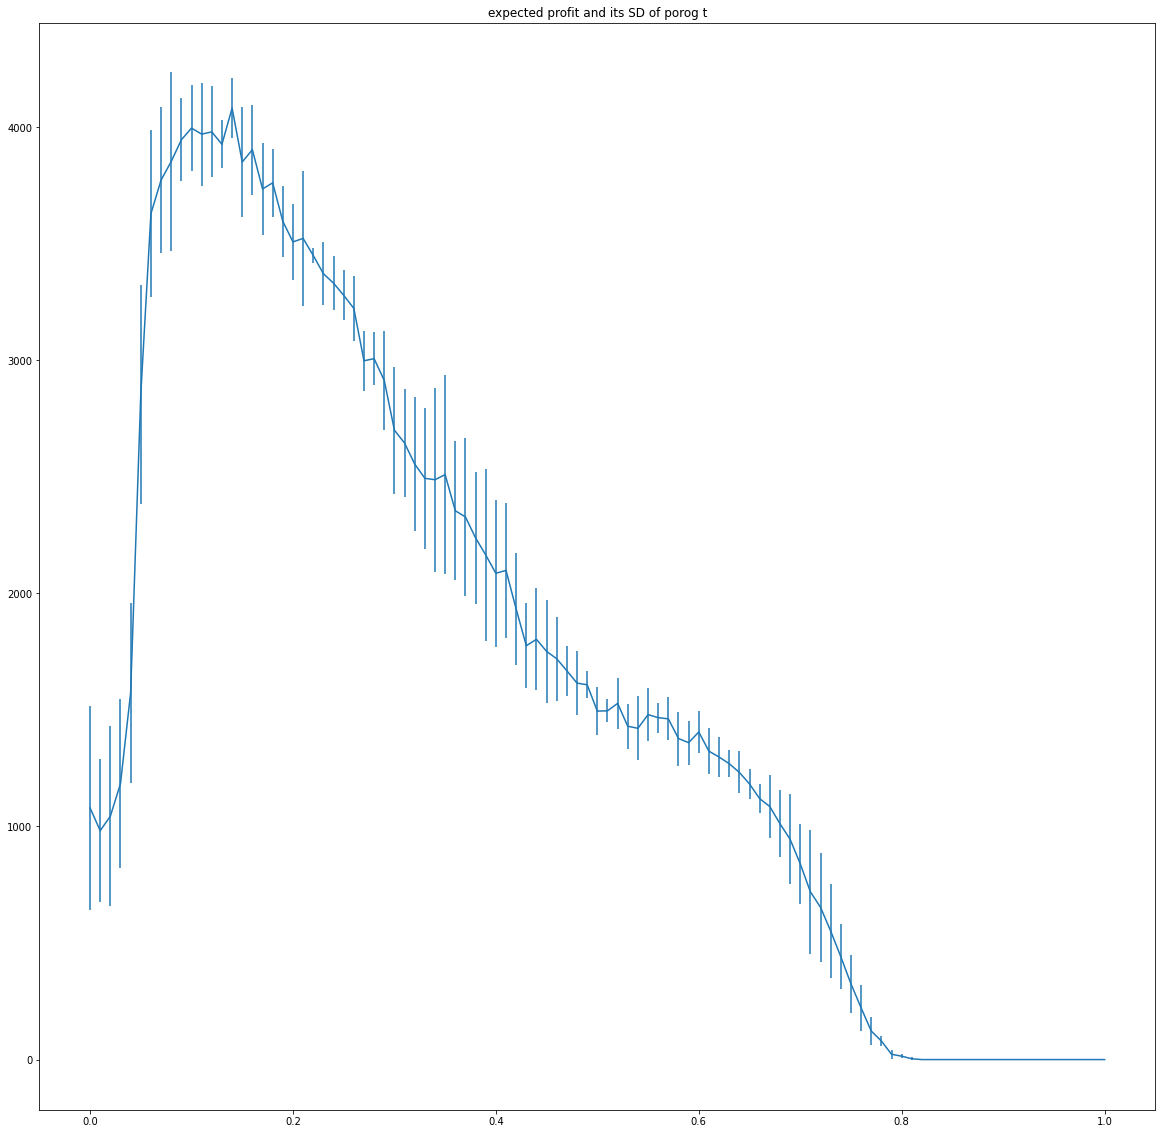

In [120]:
plt.figure(figsize=(20,20))
plt.errorbar(x=np.linspace(0, 1, num=101), y=mean_pr, yerr=std_pr)
plt.title('expected profit and its SD of porog t')
plt.show()

In [121]:
# дубль 2
mean_pr = []
std_pr = []
print('|' * 101)
for t in np.linspace(0, 1, num=101):
    profit = []
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X.loc[train], X.loc[test], y[train], y[test]
        lr = LogisticRegression(C=700)
        lr.fit(X_train, y_train)
        y_pred = (lr.predict_proba(X_test)[:,1] >= np.full(len(y_test), t))
        profit.append(score_profit(y_test, y_pred))
    profit = np.array(profit)
    mean_pr.append(np.mean(profit))
    std_pr.append(np.std(profit))
    print('|', end='')

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

0.14


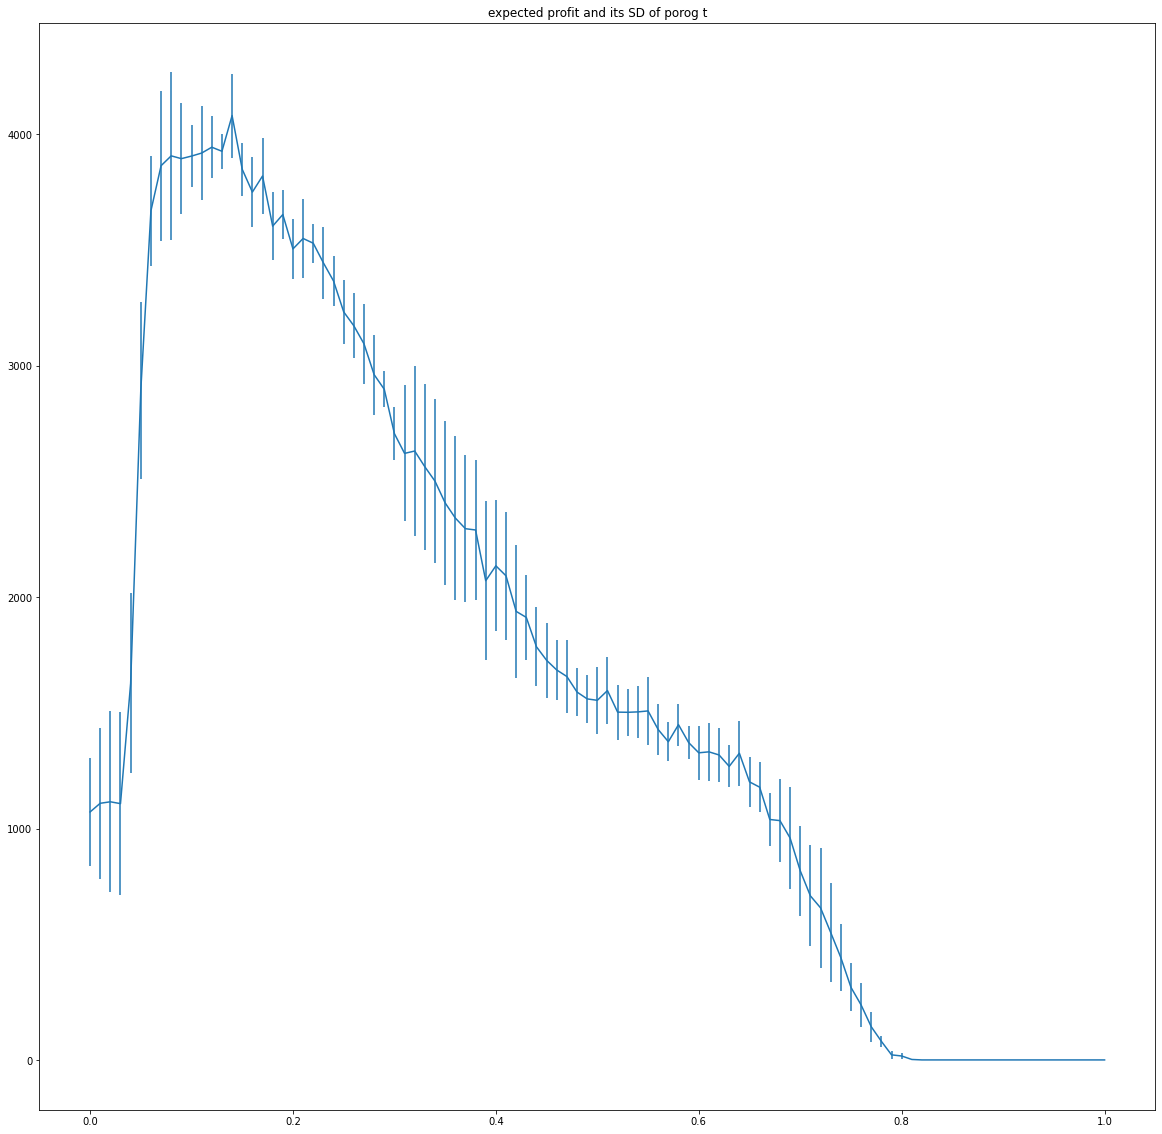

In [122]:
t_opt = np.linspace(0, 1, num=101)[np.argmax(mean_pr)]
print(t_opt)
plt.figure(figsize=(20,20))
plt.errorbar(x=np.linspace(0, 1, num=101), y=mean_pr, yerr=std_pr)
plt.title('expected profit and its SD of porog t')
plt.show()

Каковы значения precision и recall на выбранном пороге? Оцените по кросс-валидации. Также вычислите стандартное отклонение.

Во

mean precision: 0.320

mean recall: 0.626

SD of precision: 0.026

SD of recall: 0.023

In [125]:
from sklearn.metrics import precision_score, recall_score
pr = []
rec = []
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X.loc[train], X.loc[test], y[train], y[test]
    lr = LogisticRegression(C=700)
    lr.fit(X_train, y_train)
    y_pred = (lr.predict_proba(X_test)[:,1] >= np.full(len(y_test), t_opt))
    rec.append(recall_score(y_test, y_pred))
    pr.append(precision_score(y_test, y_pred))
print(f'mean precision: {np.mean(pr)}')
print(f'mean recall: {np.mean(rec)}')
print(f'SD of precision: {np.std(pr)}')
print(f'SD of recall: {np.std(rec)}')

mean precision: 0.3197962871261649
mean recall: 0.6257903454073954
SD of precision: 0.026156348769389173
SD of recall: 0.02290105816607745


Как вы, вероятно, уже поняли, ваша модель склоняется к более высокому recall. Попробуйте оценить качество модели с помощью `PR-AUC` в зоне recall $\geq$ 0.5. Сделайте это следующим образом - выберите только те пороги, на которых достигается необходимый recall, затем интерпретируйте отсеченный в единичном квадрате прямоугольник как новый единичный квадрат и посчитайте площадь под отсеченной кривой. 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LogisticRegression(C=700)
lr.fit(X_train, y_train)
y_pred = (lr.predict_proba(X_test)[:,1])

rec = precision_recall_curve(y_test, y_pred)[1]
pr = precision_recall_curve(y_test, y_pred)[0]

n = sum(rec > np.full(rec.shape[0], 0.5))
rec[:n]
print(auc(rec[:n], pr[:n])) # 0.38, такое себе качество

0.3812534270863981


__Бонус (0.01 балла):__ что вы кушали в день сдачи данного ДЗ на завтрак?

__Ответ:__ Я делаю это дз в субботу, но я знаю, что сдам его в понедельник в 2 ночи, поэтому я позавтракать не успею. Так что это можно считать правильным ответом, поэтому жду свои обещанные 0.01 балла)